# In this section we  
 - <font size="5">define the necessary imports for the project</font>
 - <font size="5">import the data into our notebook</font>
 - <font size="5">take a look at the variables present in the dataset</font>

In [52]:
# Import numpy pandas
# Also stats package
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

# Feature engineering requirement
from sklearn.preprocessing import StandardScaler

# Data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Other imports
import warnings
warnings.filterwarnings('ignore')

#Show plots within notebook
%matplotlib inline

# Import the training & test datasets 
df_train=pd.read_csv("inputs/train.csv")
df_test=pd.read_csv("inputs/test.csv")

# show the list of columns in them.
df_train.columns

# Show the first 5 columns of each DS
print(df_train.shape)
df_test.shape

(1460, 81)


(1459, 80)

In [44]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<font size=5> __In this section we analyse the target variable 'SalePrice'__</font>

<font size=5>A plot of 'SalePrice' reveals the following:</font>
 - It deviates from the normal distribution
 - It is skewed towards the right (more values towards tail, positive skewness)
 - It shows a prominent peak (kurtosis)

In [40]:
# Describe the statistical properties of SalePrice (target) variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


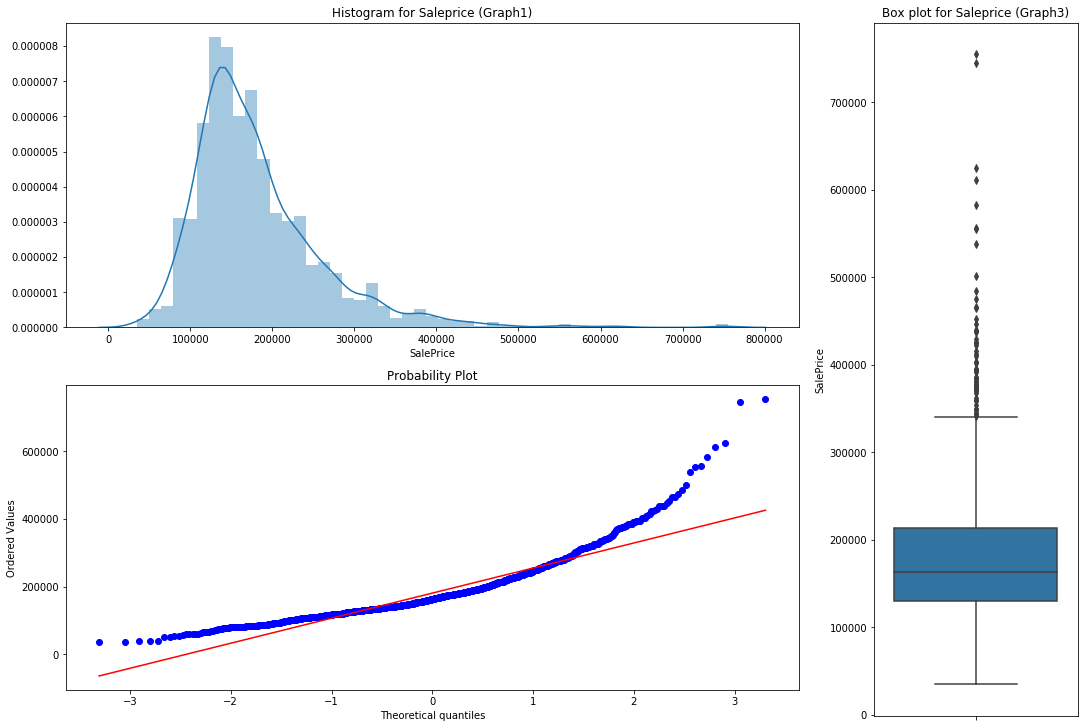

In [41]:
# Plots of SalePrice
# Histogram, Q-Q plot & Box Plot for Saleprice 

saleprice_figure=plt.figure(constrained_layout=True,figsize=(15,10))
saleprice_grid = saleprice_figure.add_gridspec(3,3)

hist_plot=saleprice_figure.add_subplot(saleprice_grid[0,:2])
hist_plot.set_title('Histogram for Saleprice (Graph1)')
sns.distplot(df_train.SalePrice,norm_hist=True, ax = hist_plot)

qq_plot=saleprice_figure.add_subplot(saleprice_grid[1,:2])
qq_plot.set_title('QQ plot for Saleprice (Graph2)')
stats.probplot(df_train['SalePrice'], plot = qq_plot)

box_plot=saleprice_figure.add_subplot(saleprice_grid[:,2])
box_plot.set_title('Box plot for Saleprice (Graph3)')
sns.boxplot(df_train['SalePrice'], ax = box_plot, orient='v')

#skewness and kurtosis describe the histogram
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

## Investigation of the relationship between target variable & chosen independent variables.
 - The first plot shows relationship between continuous variables & target variable
     - Plot of SalePrice vs GrLivArea shows marked heteroscedasticity,i.e. the target variable shows unequal levels of variance across different predictor (independent) variables. This is usually identified by a funnel-shaped scatter plot.
     - This is usually taken care of by applying tranformations such as log transforms or box cox transforms
     - Plot of SalePrice vs TotalBsmtSF shows that a number of houses do not contain a basement floor
  
  
 - The second plot shows relationship between categorical variables & target variable

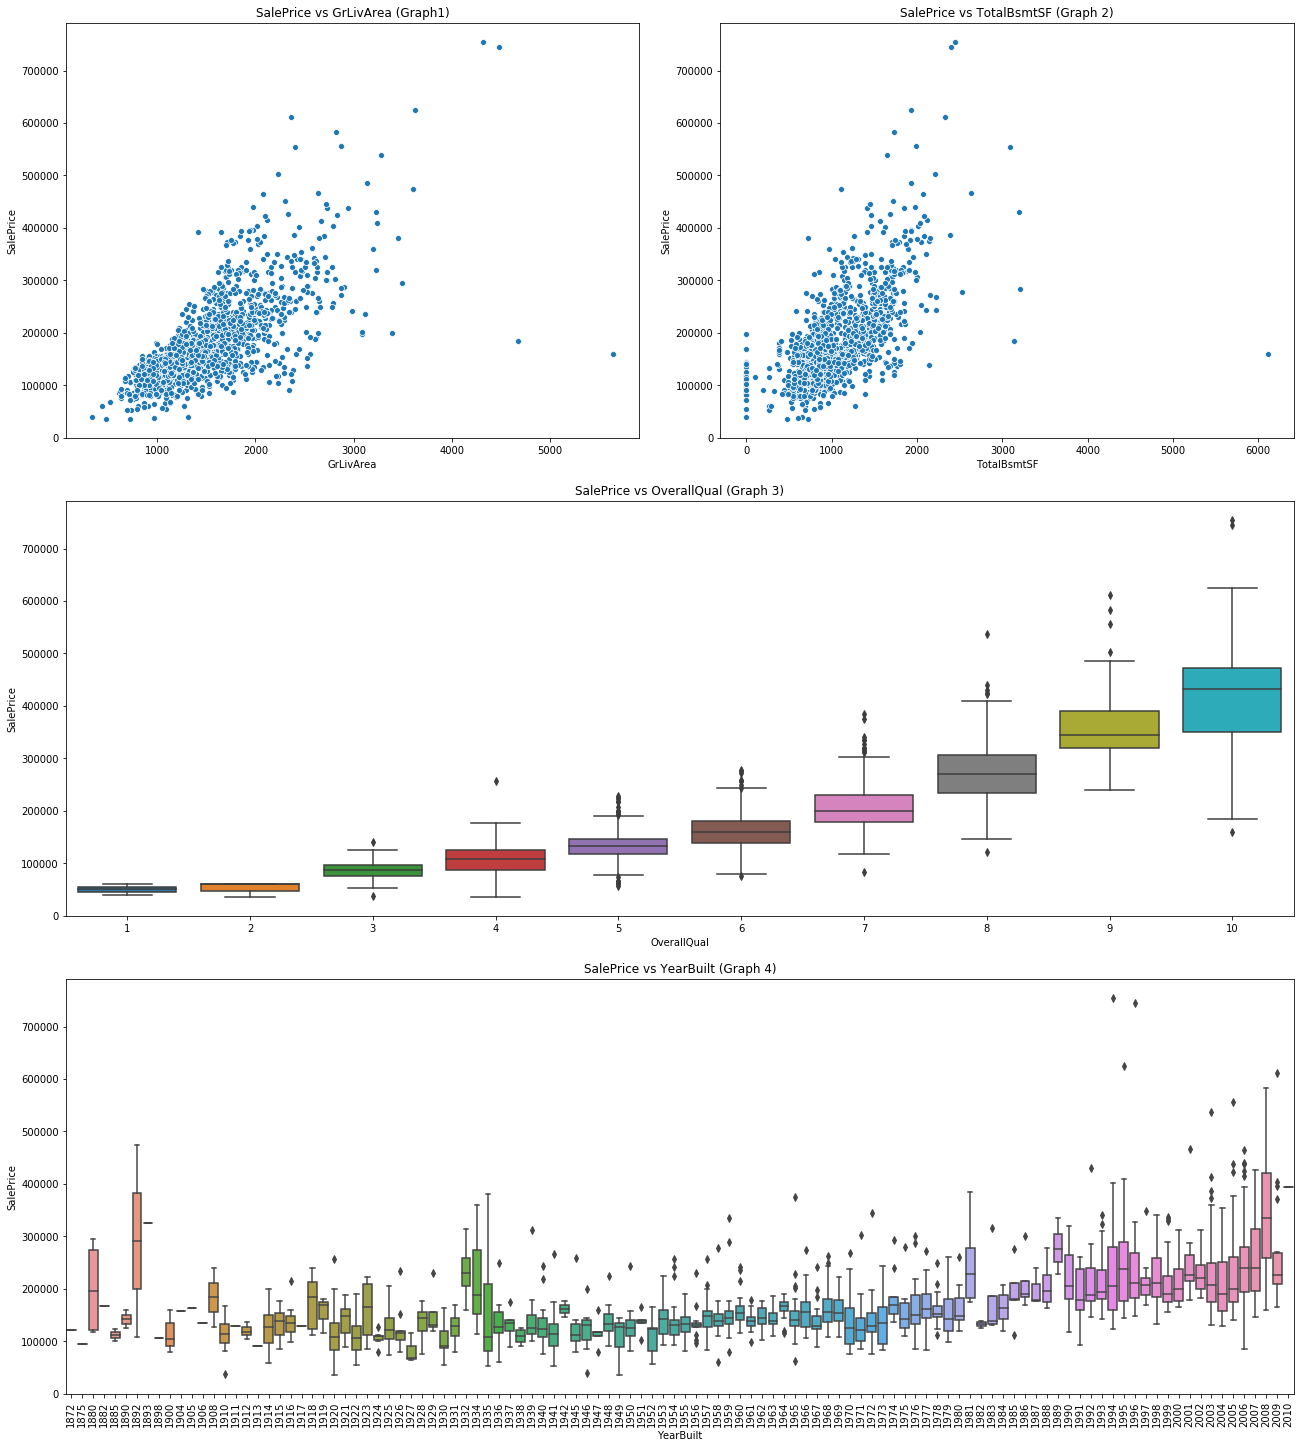

In [42]:
# Scatter plot of SalePrice vs GrLivArea
# var='GrLivArea'
# data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
figure = plt.figure(constrained_layout=True,figsize=(18,20))
grid = figure.add_gridspec(3,2)

# Continuous variables vs target variable
graph1=figure.add_subplot(grid[0,:1])
graph1.set_title('SalePrice vs GrLivArea (Graph1)')
sns.scatterplot(df_train.GrLivArea,df_train.SalePrice,ax=graph1)

graph2=figure.add_subplot(grid[0,1:])
graph2.set_title('SalePrice vs TotalBsmtSF (Graph 2)')
sns.scatterplot(df_train.TotalBsmtSF,df_train.SalePrice,ax=graph2)

# Categorical variables vs target variable
graph3=figure.add_subplot(grid[1,:])
graph3.set_title('SalePrice vs OverallQual (Graph 3)')
sns.boxplot(df_train.OverallQual,df_train.SalePrice,ax = graph3);

graph4=figure.add_subplot(grid[2,:])
graph4.set_title('SalePrice vs YearBuilt (Graph 4)')
boxplot=sns.boxplot(df_train.YearBuilt,df_train.SalePrice,ax = graph4);
_= boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=90)
#type(boxplot)

## Correlation between target variable (SalePrice) & predictor variables.
 - The line calculates the correlation coefficients between each predictor and the target variable
 - Values with null/NA are automatically ignored
 - Negative correlation co-efficient indicates that target and the predictor move in opposite directions
 - Square of the correlation co-efficient (r<sup>2</sup>) represents the degree or extent to which the variance of one variable is related to the variance of the second variable
 - The r<sup>2</sup> here is not to be confused with R<sup>2</sup>, which is an evaluation metric for linear regression machine learning models.

In [58]:
(df_train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

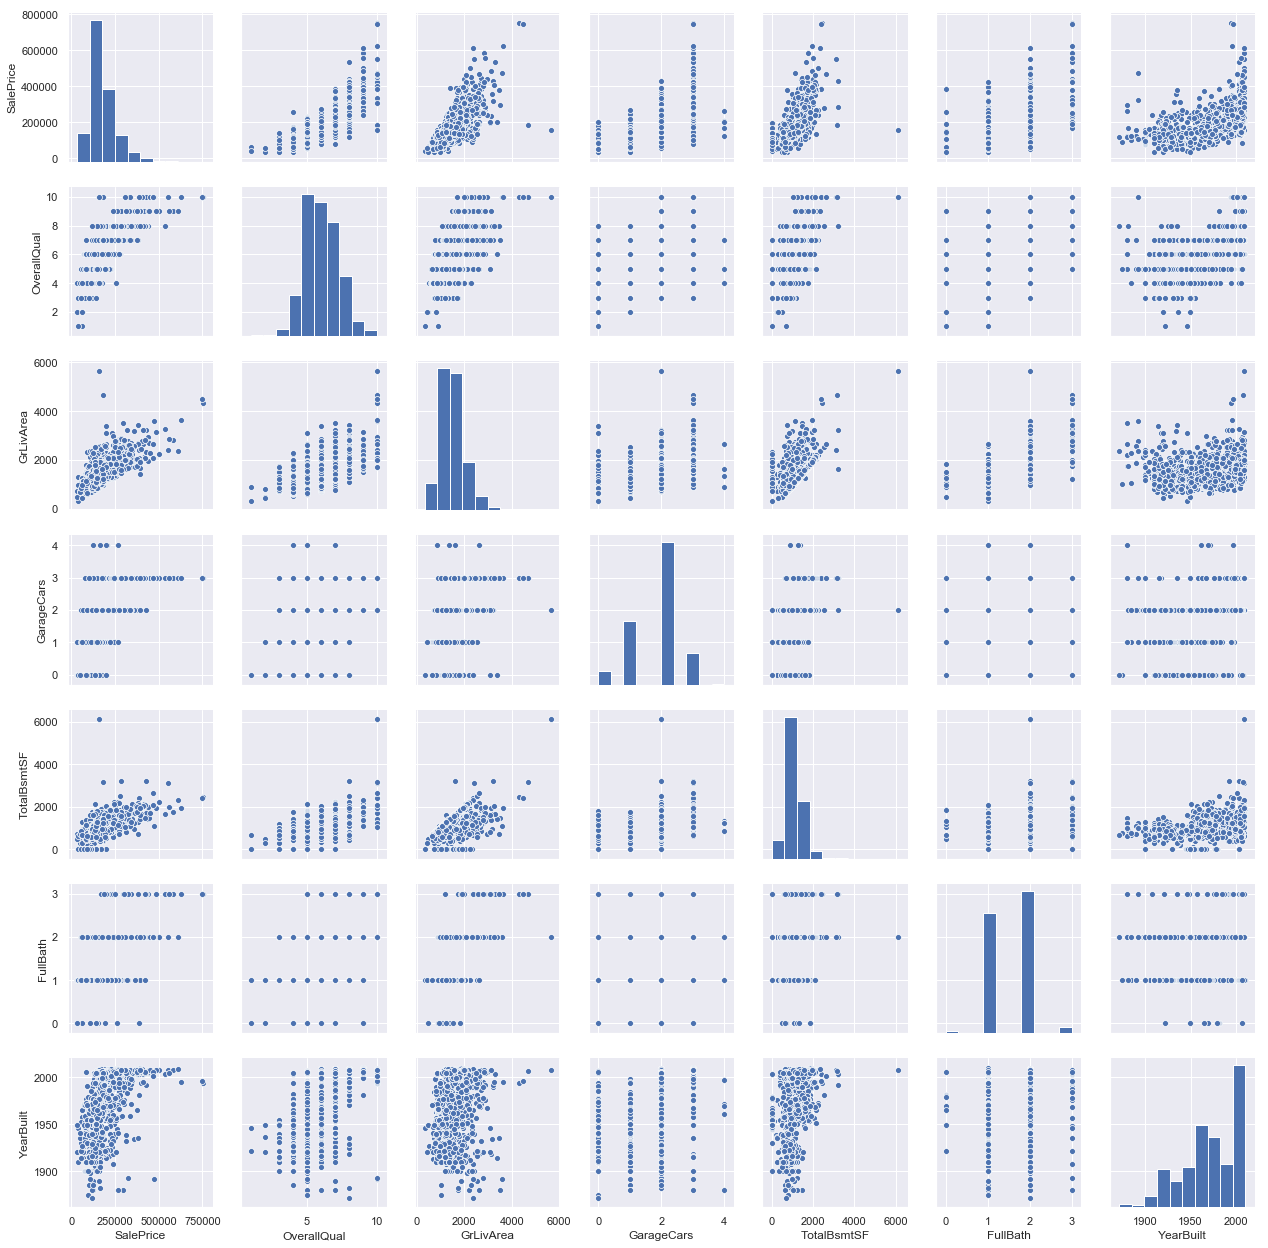

In [59]:
# Visualize the relationship between the top 5 correlated predictor variables & target variable.
# GarageCars and GarageArea variables are closely correlated.
# We choose GarageCars because it's correlation is higher than that of GarageArea
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Dealing with missing values.
 - Missing values have associated with them the following questions:
    - How prevalent are they ?
    - Are they random or is there a discernible pattern ?
 - These questions are important because:
    - Missing data implies a reduction in the dataset
    - We need to be sure that deletion of rows containing missing data does not accidentally remove relevant information.

In [ ]:
# Visualizing the distribution of missing data
# function that takes in a dataframe and plots a graph

In [53]:
# function that takes in a dataframe as input & returns a dataframe of two columns
# features containing missing data &
# percentage of missing data in each of them.
def percent_missing_values(df):
    total_missing=df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)!=0]
    percent_missing=(df.isnull().sum().sort_values(ascending = False)/len(df)*100)[(df.isnull().sum().sort_values(ascending=False)/len(df)*100)!=0]
    return pd.concat([total_missing, percent_missing], axis=1, keys=['Total','Percent'])
       
print(percent_missing_values(df_train))
percent_missing_values(df_test)

              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageCond       81   5.547945
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtFinType1     37   2.534247
BsmtCond         37   2.534247
BsmtQual         37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493


,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127
